###  ***Loading datasets***

In [16]:
import pandas as pd

energy_efficiency_df = pd.read_csv('/Users/shakthimaha/Downloads/Hackthon_KCL/Energy effieciency/LBSM_All_London.csv', low_memory=False)
all_house_holds_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/Income + Number of individiual/houshold income.xls', sheet_name='iadatasheet1')
fuel_poverty_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/FuelPoverty_2009-2011/fuel poverty.xlsx', sheet_name='LSOA 2009 - 2011')
dwelling_type_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/built period + house types/dwelling-build-period and-property-type-2014-lsoa-msoa.xlsx', sheet_name='Table 2.4')
dwelling_build_period_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/built period + house types/dwelling-build-period and-property-type-2014-lsoa-msoa.xlsx', sheet_name='Table 4.4')
income_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/Income + Number of individiual/houshold income.xls', sheet_name='iadatasheet2')
gas_consumption_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/Gas_Consumption_Domestic/LSOA_domestic_gas_2010-2023.xlsx', sheet_name='2011')
elec_consumption_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/Electricity_Consumption_Domestic/LSOA_domestic_elec_2010-2023.xlsx', sheet_name='2011')
zcored_data_df = pd.read_csv('/Users/shakthimaha/Downloads/Hackthon_KCL/zcored_data.csv')

In [17]:
fuel_poverty_df.columns = fuel_poverty_df.iloc[0]  # Set the first row as column names
fuel_poverty_df = fuel_poverty_df[1:].reset_index(drop=True)  # Drop the first row and reset index
print(fuel_poverty_df.columns)

Index([  'LSOA 2001 Code',   'LSOA 2001 Name',          'LA Name',
                   2009.0,             2010.0, 'Fuelpoverty-2011'],
      dtype='object', name=0)


In [18]:
gas_consumption_df.columns

Index(['Local authority code', 'Local authority', 'MSOA code',
       'Middle layer super output area', 'LSOA code',
       'Lower layer super output area', 'Number\nof meters\n',
       'Total \nconsumption\n(kWh)', 'Mean consumption',
       'Median consumption (kWh per meter)'],
      dtype='object')

In [19]:
elec_consumption_df.columns

Index(['Local authority code', 'Local authority', 'MSOA code',
       'Middle layer super output area', 'LSOA code',
       'Lower layer super output area', 'Number\nof meters\n',
       'Total \nconsumption\n(kWh)', 'Mean consumption\n',
       'Median consumption (kWh per meter)'],
      dtype='object')

In [20]:
zcored_data_df.columns


Index(['LSOA11CD', 'LSOA11NM', 'geometry', 'Fuel_Poverty_2011',
       'Mean_Elec_Consumption', 'Mean_Gas_Consumption', 'Avg_Build_Year',
       'Median_Annual_household_income', 'Density_of_Households',
       'households_with_resident_percentage',
       'households_no_resident_percentage', 'whole_house_detached_percentage',
       'whole_house_semi_detached_percentage',
       'whole_house_terraced_percentage',
       'flat_maisonette_apartment_percentage',
       'Revised_Energy_Efficiency_Rating_Numeric',
       'Revised_Energy_Efficiency'],
      dtype='object')

In [21]:

# Rename LSOA column for consistency
energy_efficiency_df.rename(columns={'LSOA': 'LSOA11CD'}, inplace=True)
fuel_poverty_df.rename(columns={'LSOA 2001 Code': 'LSOA11CD'}, inplace=True)
dwelling_type_df.rename(columns={'Area Code': 'LSOA11CD'}, inplace=True)
dwelling_build_period_df.rename(columns={'Area Code3': 'LSOA11CD'}, inplace=True)
income_df.rename(columns={'Codes': 'LSOA11CD'}, inplace=True)
gas_consumption_df.rename(columns={'LSOA code': 'LSOA11CD'}, inplace=True)
elec_consumption_df.rename(columns={'LSOA code': 'LSOA11CD'}, inplace=True)
all_house_holds_df.rename(columns={'Codes': 'LSOA11CD'}, inplace=True)


In [22]:
for df_name, df in {
    'energy_efficiency_df': energy_efficiency_df,
    'fuel_poverty_df': fuel_poverty_df,
    'dwelling_type': dwelling_type_df,
    'dwelling_build_period_df': dwelling_build_period_df,
    'income_tax_payers_df': income_df,
    'gas_consumption_df': gas_consumption_df,
    'elec_consumption_df': elec_consumption_df,
    'zcored_data_df': zcored_data_df,
    'all_house_holds_df': all_house_holds_df,
    
}.items():
    if 'LSOA11CD' not in df.columns:
        print(f"Warning: {df_name} does not contain 'LSOA11CD'")

In [23]:
# Check the number of unique LSOA codes in the zcored_data_df
num_lsoa_codes = zcored_data_df['LSOA11CD'].nunique()
print(f"Number of unique LSOA codes: {num_lsoa_codes}")

Number of unique LSOA codes: 4642


In [24]:
# Check the number of rows in the zcored_data_df
num_rows = zcored_data_df.shape[0]
print(f"Number of rows in the zcored_data_df: {num_rows}")

Number of rows in the zcored_data_df: 4642


### **Merging the dataset**


In [31]:
import pandas as pd
import numpy as np

# Ensure there are no duplicates in each dataset before merging
energy_efficiency_df = energy_efficiency_df.drop_duplicates(subset=['LSOA11CD'])
income_df = income_df.drop_duplicates(subset=['LSOA11CD'])
fuel_poverty_df = fuel_poverty_df.drop_duplicates(subset=['LSOA11CD'])
dwelling_type_df = dwelling_type_df.drop_duplicates(subset=['LSOA11CD'])
dwelling_build_period_df = dwelling_build_period_df.drop_duplicates(subset=['LSOA11CD'])
gas_consumption_df = gas_consumption_df.drop_duplicates(subset=['LSOA11CD'])
elec_consumption_df = elec_consumption_df.drop_duplicates(subset=['LSOA11CD'])
zcored_data_df = zcored_data_df.drop_duplicates(subset=['LSOA11CD'])
all_house_holds_df = all_house_holds_df.drop_duplicates(subset=['LSOA11CD'])

# Select relevant columns (keep this as before)
energy_efficiency_df = energy_efficiency_df[['LSOA11CD', 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA', 'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA']]
income_df = income_df[['LSOA11CD','Median Annual Household Income estimate (£)']]
fuel_poverty_df = fuel_poverty_df[['LSOA11CD', 'Fuelpoverty-2011']]
dwelling_type_df = dwelling_type_df[['LSOA11CD', 'Flat/Maisonette Total', 'House Terraced Total', 'House Semi-detached Total', 'House Detached Total']]
dwelling_build_period_df = dwelling_build_period_df[['LSOA11CD', 'Pre 1900', '1900 to 1918', '1919 to 1929', '1930 to 1939', '1945 to 1954', '1955 to 1964', 
                              '1965 to 1972', '1973 to 1982', '1983 to 1992', '1993 to 1999', '2000 to 2009', '2010 to 2012']]
gas_consumption_df = gas_consumption_df[['LSOA11CD', 'Median consumption (kWh per meter)']]
elec_consumption_df = elec_consumption_df[['LSOA11CD', 'Median consumption (kWh per meter)']]
zcored_data_df = zcored_data_df[['LSOA11CD', 'LSOA11NM', 'geometry']]
all_house_holds_df = all_house_holds_df[['LSOA11CD', 'All households 2011']]

# Merge all datasets on LSOA11CD with left join to retain all rows from zcored_data_df
merged_df = zcored_data_df \
    .merge(energy_efficiency_df, on='LSOA11CD', how='left') \
    .merge(income_df, on='LSOA11CD', how='left') \
    .merge(fuel_poverty_df, on='LSOA11CD', how='left') \
    .merge(dwelling_type_df, on='LSOA11CD', how='left') \
    .merge(dwelling_build_period_df, on='LSOA11CD', how='left') \
    .merge(gas_consumption_df, on='LSOA11CD', how='left') \
    .merge(elec_consumption_df, on='LSOA11CD', how='left') \
    .merge(all_house_holds_df, on='LSOA11CD', how='left')  # Added the all_house_holds_df merge

# Replace all dashes with NaN
merged_df.replace('-', np.nan, inplace=True)

# Display the first few rows of the merged DataFrame to check
print(merged_df.head())

# Check the shape of the merged dataset to confirm the number of rows
print(f"Number of rows in merged dataset: {merged_df.shape[0]}")

# Optionally, save the final merged dataset to a CSV
output_file = '/Users/shakthimaha/Downloads/Hackthon_KCL/merged_data.csv'
merged_df.to_csv(output_file, index=False)

print(f"Merged data saved to {output_file}")

    LSOA11CD                   LSOA11NM  \
0  E01000001        City of London 001A   
1  E01000002        City of London 001B   
2  E01000003        City of London 001C   
3  E01000005        City of London 001E   
4  E01000006  Barking and Dagenham 016A   

                                            geometry  \
0  POLYGON ((-0.097262816705372 51.52157881522085...   
1  POLYGON ((-0.0881031757855782 51.5194123775888...   
2  POLYGON ((-0.0967598383726936 51.5232512920432...   
3  POLYGON ((-0.0732048670708826 51.5100037359235...   
4  POLYGON ((0.0911789815733874 51.53908634564686...   

   AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA  \
0                                              64.0   
1                                              55.0   
2                                               NaN   
3                                              61.0   
4                                               NaN   

  AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA  \
0                      

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_82837/1119302119.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.replace('-', np.nan, inplace=True)


### ***cleaning the merged dataset***

In [32]:
import geopandas as gpd
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/shakthimaha/Downloads/Hackthon_KCL/merged_data.csv")

# Define new column names
new_column_names = {
    "LSOA11CD": "Lsoa_code",
    "LSOA11NM": "Lsoa_name",
    "geometry": "Geometry",
    "AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA": "energy_efficiency_floor_area",
    "AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA": "energy_rating_floor_area",
    "Median £ 2011-12": "median_income_2011_12",
    "Number of Individuals2011-12": "number_of_individuals_2011_12",
    "Fuelpoverty-2011": "Fuelpoverty-2011",
    "Flat/Maisonette Total": "flat_maisonette_total",
    "House Terraced Total": "house_terraced_total",
    "House Semi-detached Total": "house_semi_detached_total",
    "House Detached Total": "house_detached_total",
    "Pre 1900": "built_pre_1900",
    "1900 to 1918": "built_1900_1918",
    "1919 to 1929": "built_1919_1929",
    "1930 to 1939": "built_1930_1939",
    "1945 to 1954": "built_1945_1954",
    "1955 to 1964": "built_1955_1964",
    "1965 to 1972": "built_1965_1972",
    "1973 to 1982": "built_1973_1982",
    "1983 to 1992": "built_1983_1992",
    "1993 to 1999": "built_1993_1999",
    "2000 to 2009": "built_2000_2009",
    "2010 to 2012": "built_2010_2012",
    "Median consumption (kWh per meter)_x": "Gas median consumption (kwh)",
    "Median consumption (kWh per meter)_y": "Electricity median_consumption (kwh)",
   
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

# Display updated column names
print(df.head())

   Lsoa_code                  Lsoa_name  \
0  E01000001        City of London 001A   
1  E01000002        City of London 001B   
2  E01000003        City of London 001C   
3  E01000005        City of London 001E   
4  E01000006  Barking and Dagenham 016A   

                                            Geometry  \
0  POLYGON ((-0.097262816705372 51.52157881522085...   
1  POLYGON ((-0.0881031757855782 51.5194123775888...   
2  POLYGON ((-0.0967598383726936 51.5232512920432...   
3  POLYGON ((-0.0732048670708826 51.5100037359235...   
4  POLYGON ((0.0911789815733874 51.53908634564686...   

   energy_efficiency_floor_area energy_rating_floor_area  \
0                          64.0                        D   
1                          55.0                        E   
2                           NaN                      NaN   
3                          61.0                        D   
4                           NaN                      NaN   

   Median Annual Household Income estimate 

In [33]:
# Calculate the percentage of missing values in each column
null_percentage = df.isnull().mean() * 100

# Display the columns with their null percentage
print(null_percentage)

Lsoa_code                                       0.000000
Lsoa_name                                       0.000000
Geometry                                        0.000000
energy_efficiency_floor_area                   42.007755
energy_rating_floor_area                       42.007755
Median Annual Household Income estimate (£)     0.000000
Fuelpoverty-2011                                0.000000
flat_maisonette_total                           2.003447
house_terraced_total                            4.200776
house_semi_detached_total                      21.154675
house_detached_total                           48.276605
built_pre_1900                                 29.707023
built_1900_1918                                38.345541
built_1919_1929                                44.054287
built_1930_1939                                26.518742
built_1945_1954                                39.918139
built_1955_1964                                31.947436
built_1965_1972                

In [34]:
# Drop columns with > 50% missing values (like 'built_2010_2012' in your case)
threshold = 50  # You can adjust this threshold
df = df.loc[:, null_percentage < threshold]
print("\nColumns dropped due to high missing values.\n")


# Fill missing values for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)  # Using median to handle skewed data
    

# Fill missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)  # Creating an "Unknown" category for missing categorical data

print("\nMissing values handled successfully!\n")


Columns dropped due to high missing values.


Missing values handled successfully!



/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_15784/3003627802.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Using median to handle skewed data
/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_15784/3003627802.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

In [35]:
# Calculate the percentage of missing values in each column
null_percentage = df.isnull().mean() * 100

# Display the columns with their null percentage
print(null_percentage)

Lsoa_code                                      0.0
Lsoa_name                                      0.0
Geometry                                       0.0
energy_efficiency_floor_area                   0.0
energy_rating_floor_area                       0.0
Median Annual Household Income estimate (£)    0.0
Fuelpoverty-2011                               0.0
flat_maisonette_total                          0.0
house_terraced_total                           0.0
house_semi_detached_total                      0.0
house_detached_total                           0.0
built_pre_1900                                 0.0
built_1900_1918                                0.0
built_1919_1929                                0.0
built_1930_1939                                0.0
built_1945_1954                                0.0
built_1955_1964                                0.0
built_1965_1972                                0.0
built_1973_1982                                0.0
built_1983_1992                

In [36]:
# List all column names to check for any formatting issues
print(df.columns)

Index(['Lsoa_code', 'Lsoa_name', 'Geometry', 'energy_efficiency_floor_area',
       'energy_rating_floor_area',
       'Median Annual Household Income estimate (£)', 'Fuelpoverty-2011',
       'flat_maisonette_total', 'house_terraced_total',
       'house_semi_detached_total', 'house_detached_total', 'built_pre_1900',
       'built_1900_1918', 'built_1919_1929', 'built_1930_1939',
       'built_1945_1954', 'built_1955_1964', 'built_1965_1972',
       'built_1973_1982', 'built_1983_1992', 'built_2000_2009',
       'Gas median consumption (kwh)', 'Electricity median_consumption (kwh)',
       'All households 2011'],
      dtype='object')


In [37]:
# Strip any leading/trailing whitespaces in column names
df.columns = df.columns.str.strip()

##  visualize correlations specifically with fuel_poverty_2011

Fuelpoverty-2011                               1.000000
Gas median consumption (kwh)                   0.208824
Electricity median_consumption (kwh)           0.147429
house_semi_detached_total                      0.117905
built_1919_1929                                0.101902
built_1930_1939                                0.095161
house_detached_total                           0.077142
built_1900_1918                                0.054141
house_terraced_total                           0.050400
Median Annual Household Income estimate (£)    0.033596
energy_efficiency_floor_area                  -0.003514
built_pre_1900                                -0.015278
built_1945_1954                               -0.022140
built_1955_1964                               -0.026111
built_2000_2009                               -0.083319
built_1965_1972                               -0.098774
built_1973_1982                               -0.107054
built_1983_1992                               -0

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_15784/2338231531.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette=colors)


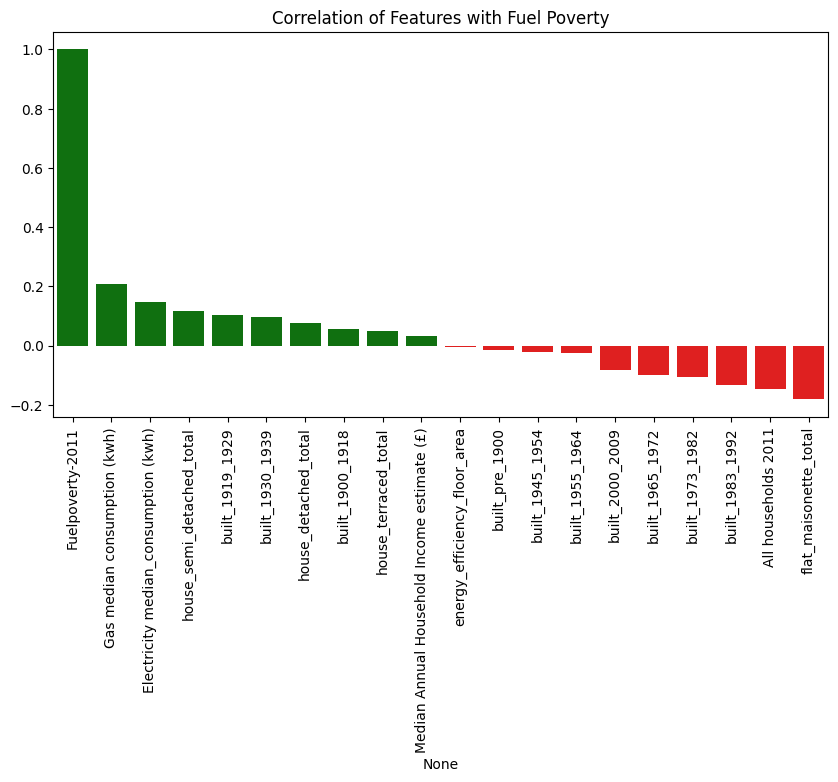

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute correlation with 'Fuelpoverty-2011'
correlation = df[numeric_cols].corr()["Fuelpoverty-2011"].sort_values(ascending=False)

# Print the correlations
print(correlation)

# Create a custom color palette for positive and negative correlations
colors = ['green' if val > 0 else 'red' for val in correlation.values]

# Visualizing top correlations with different colors for positive and negative correlations
plt.figure(figsize=(10,5))
sns.barplot(x=correlation.index, y=correlation.values, palette=colors)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Fuel Poverty")
plt.show()